In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13582336/13568290 [==============================] - 1s 0us/step


In [3]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [4]:
# we gona take every sith row, so every hour
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [5]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:16]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


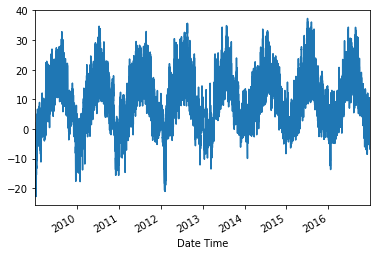

In [6]:
# due to index as a datetime we can plot default x plot as a time
# we can see obvious pattern here
temp = df['T (degC)']
temp.plot()

In [7]:
# for deep learning models we need a data always to be in some kind of input matrix (if its more complicated it might become a 3d or 4d tensor)
# matrix where each row gona be our inputs and it has corresponding label
# we gona end with something a bit more complicated than matrix

# we gona predict for every 5 hours a temp for next hour
# so for 1,2,3,4,5 hour we predict 6 hour, and then after we get 6 hour we bump it over one step - we 'drop' 1 hour and take 6 hour instead and we try to predict 7 hour

# X=[[[1], [2], [3], [4], [5]]]; Y=[6]
# X=[[[2], [3], [4], [5], [6]]]; Y=[7]
# X=[[[3], [4], [5], [6], [7]]]; Y=[8]

# we can se above the X matrix and Y vector (input and corresponding output)
# its creating supervised learning model to forecasting problem

# The X matrix looks like this - each hour is wrapped in a list because if we were to do multivariate (more variables), 
# then we might include other sorts of variables in this lists as well e.g. [temperature, pressure, humidity]:
# X=[[[1, 2, 1], [2, 2, 1], [3, 3, 2], [4, 2, 3], [5, 2, 1]]]; Y=[6]

#X matrix is actually a 3d tensor


def df_to_X_y(df, window_size):
  """
  This function returns X array and y array 

  Parameters:
    df (dataframe): our dataframe
    window_size (int): this parameter decides how many last measurements we gonna take into consideration
  """
  df_as_np =df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    # we taking 5 values and put them in a list separately
    row = [[a] for a in df_as_np[i:i+5]]
    X.append(row)
    # label is the next value after row
    label = df_as_np[i+5]
    y.append(label)
  return np.array(X), np.array(y)


In [8]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((70086, 5, 1), (70086,))

In [43]:
X

array([[[-8.05],
        [-8.88],
        [-8.81],
        [-9.05],
        [-9.63]],

       [[-8.88],
        [-8.81],
        [-9.05],
        [-9.63],
        [-9.67]],

       [[-8.81],
        [-9.05],
        [-9.63],
        [-9.67],
        [-9.17]],

       ...,

       [[ 2.44],
        [ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ]],

       [[ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75]],

       [[-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75],
        [-2.89]]])

In [9]:
# split to train validation
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(60000, 5, 1) (60000,)
(5000, 5, 1) (5000,)
(5086, 5, 1) (5086,)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [11]:
model1 = Sequential()
# we specify 5 by 1 vector as an input
model1.add(InputLayer((5, 1)))
# we pass it to neural network (we can use GRU as well)
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
# we want linear value, we want to predict temp (positive or negative) so we want it to be linear
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [12]:
# cp1 tells the model to save when validation loss is the smallest
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [14]:
# each epoch should decrease the loss, we can tune learning_rate to increase the the performance
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 37.1250 - root_mean_squared_error: 6.0930 - val_loss: 1.2197 - val_root_mean_squared_error: 1.1044


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.0393 - root_mean_squared_error: 1.4280 - val_loss: 0.6143 - val_root_mean_squared_error: 0.7838


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9401 - root_mean_squared_error: 0.9696 - val_loss: 0.5284 - val_root_mean_squared_error: 0.7269


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7334 - root_mean_squared_error: 0.8564 - val_loss: 0.5097 - val_root_mean_squared_error: 0.7140


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6852 - root_mean_squared_error: 0.8278 - val_loss: 0.5071 - val_root_mean_squared_error: 0.7121


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6686 - root_mean_squared_error: 0.8177 - val_loss: 0.5281 - val_root_mean_squared_error: 0.7267
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6596 - root_mean_squared_error: 0.8121 - val_loss: 0.5111 - val_root_mean_squared_error: 0.7149
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6542 - root_mean_squared_error: 0.8088 - val_loss: 0.5074 - val_root_mean_squared_error: 0.7123
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6494 - root_mean_squared_error: 0.8059 - val_loss: 0.4918 - val_root_mean_squared_error: 0.7013


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6482 - root_mean_squared_error: 0.8051 - val_loss: 0.5006 - val_root_mean_squared_error: 0.7076


In [16]:
# it loads the model into memory
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [29]:
# we flatten becouse we dont want to have the X=[[[3], [4], [5], [6], [7]]] -> X=[[3, 4, 5, 6, 7]] inner brackets
train_predictions = model1.predict(X_train).flatten()
# we make a dataframe from results put in dict, and show it below
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

,Train Predictions,Actuals
0,-9.844888,-9.67
1,-9.644869,-9.17
2,-8.778351,-8.10
3,-7.311882,-7.66
4,-7.143029,-7.04
...,...,...
59995,5.970807,6.07
59996,7.081982,9.88
59997,11.952713,13.53
59998,15.840811,15.43


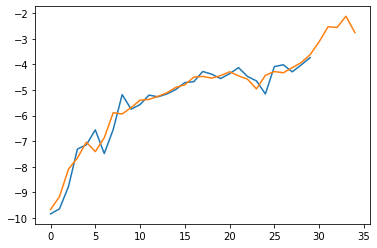

In [30]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:30])
plt.plot(train_results['Actuals'][:35])

In [31]:
# the same thing for validation data
# we flatten becouse we dont want to have the X=[[[3], [4], [5], [6], [7]]] -> X=[[3, 4, 5, 6, 7]] inner brackets
val_predictions = model1.predict(X_val).flatten()
# we make a dataframe from results put in dict, and show it below
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

,Val Predictions,Actuals
0,15.339008,14.02
1,13.279324,13.67
2,13.107136,12.27
3,11.494287,11.19
4,10.394014,10.85
...,...,...
4995,17.303738,18.27
4996,17.373037,17.85
4997,17.175291,16.65
4998,15.915093,15.85


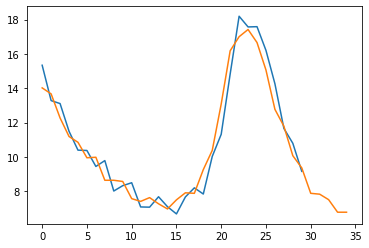

In [32]:
plt.plot(val_results['Val Predictions'][:30])
plt.plot(val_results['Actuals'][:35])

In [33]:
# the same thing for test data
# we flatten becouse we dont want to have the X=[[[3], [4], [5], [6], [7]]] -> X=[[3, 4, 5, 6, 7]] inner brackets
test_predictions = model1.predict(X_test).flatten()
# we make a dataframe from results put in dict, and show it below
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

,Test Predictions,Actuals
0,14.480309,13.99
1,13.285397,13.46
2,12.895219,12.93
3,12.491865,12.43
4,12.041499,12.17
...,...,...
5081,-1.118774,-0.98
5082,-1.395692,-1.40
5083,-1.640260,-2.75
5084,-3.328952,-2.89


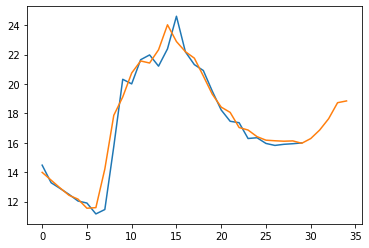

In [34]:
plt.plot(test_results['Test Predictions'][:30])
plt.plot(test_results['Actuals'][:35])

In [ ]:
# CONVULTIONAL NEURAL NETWORK
# https://towardsdatascience.com/a-comparison-of-dnn-cnn-and-lstm-using-tf-keras-2191f8c77bbe

In [35]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 64)             192       
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 2056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [36]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [37]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 [==============================] - 1s 574us/step - loss: 3.3969 - root_mean_squared_error: 1.8431 - val_loss: 0.8785 - val_root_mean_squared_error: 0.9373
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 2/10
1875/1875 [==============================] - 1s 529us/step - loss: 0.9255 - root_mean_squared_error: 0.9620 - val_loss: 0.6078 - val_root_mean_squared_error: 0.7796
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 3/10
1875/1875 [==============================] - 1s 517us/step - loss: 0.7376 - root_mean_squared_error: 0.8588 - val_loss: 0.5338 - val_root_mean_squared_error: 0.7306
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 4/10
1875/1875 [==============================] - 1s 514us/step - loss: 0.6867 - root_mean_squared_error: 0.8287 - val_loss: 0.5095 - val_root_mean_squared_error: 0.7138
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 5/10
1875/1875 [==============================] - 1s 507us/step - loss: 0.6726 - root_mean_squared_error: 0.8201 - val_loss: 0.5030 - val_root_mean_squared_error: 0.7092
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 6/10
1875/1875 [==============================] - 1s 508us/step - loss: 0.6675 - root_mean_squared_error: 0.8170 - val_loss: 0.5069 - val_root_mean_squared_error: 0.7119
Epoch 7/10
1875/1875 [==============================] - 1s 508us/step - loss: 0.6624 - root_mean_squared_error: 0.8139 - val_loss: 0.5134 - val_root_mean_squared_error: 0.7165
Epoch 8/10
1875/1875 [==============================] - 1s 507us/step - loss: 0.6591 - root_mean_squared_error: 0.8119 - val_loss: 0.5269 - val_root_mean_squared_error: 0.7259
Epoch 9/10
1875/1875 [==============================] - 1s 513us/step - loss: 0.6581 - root_mean_squared_error: 0.8112 - val_loss: 0.4970 - val_root_mean_squared_error: 0.7050
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 10/10
1875/1875 [==============================] - 1s 509us/step - loss: 0.6584 - root_mean_squared_error: 0.8114 - val_loss: 0.4914 - val_root_mean_squared_error: 0.7010
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


In [ ]:
# Gated Recurring Units
# more prone to overfitting if you got more parameters and more complexity
"""GRU couples forget as well as input gates. GRU use less training parameters and therefore use less memory, 
execute faster and train faster than LSTM's whereas LSTM is more accurate on dataset using longer sequence. 
In short, if sequence is large or accuracy is very critical, please go for LSTM whereas for less memory consumption and 
faster operation go for GRU. If you donot have much floating point operations per second (FLOP's) to spare switch to GRU. 
LSTM has three values at output (output, hidden and cell) whereas GRU has two values at output (output and hidden)."""

In [38]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 64)                12864     
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [39]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [40]:
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp3])

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 52.7189 - root_mean_squared_error: 7.2608 - val_loss: 2.3491 - val_root_mean_squared_error: 1.5327


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 4.6797 - root_mean_squared_error: 2.1633 - val_loss: 0.7078 - val_root_mean_squared_error: 0.8413


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3266 - root_mean_squared_error: 1.1518 - val_loss: 0.5462 - val_root_mean_squared_error: 0.7391


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8120 - root_mean_squared_error: 0.9011 - val_loss: 0.5183 - val_root_mean_squared_error: 0.7199


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6985 - root_mean_squared_error: 0.8358 - val_loss: 0.4999 - val_root_mean_squared_error: 0.7070


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6679 - root_mean_squared_error: 0.8172 - val_loss: 0.4920 - val_root_mean_squared_error: 0.7014


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6582 - root_mean_squared_error: 0.8113 - val_loss: 0.5124 - val_root_mean_squared_error: 0.7158
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6522 - root_mean_squared_error: 0.8076 - val_loss: 0.4922 - val_root_mean_squared_error: 0.7015
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6479 - root_mean_squared_error: 0.8049 - val_loss: 0.5016 - val_root_mean_squared_error: 0.7082
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6453 - root_mean_squared_error: 0.8033 - val_loss: 0.4898 - val_root_mean_squared_error: 0.6999


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets
